Наши данные представляют собой четыре таблицы:

ratings1 и ratings2 — таблицы с данными о выставленных пользователями оценках фильмов. Они имеют одинаковую структуру и типы данных — на самом деле это две части одной таблицы с оценками фильмов.
Img

userId — уникальный идентификатор пользователя, который выставил оценку;
movieId — уникальный идентификатор фильма;
rating — рейтинг фильма.
dates — таблица с датами выставления всех оценок.
Img

date — дата и время выставления оценки фильму.
movies — таблица с информацией о фильмах.
Img

movieId — уникальный идентификатор фильма;
title — название фильма и год его выхода;
genres — жанры фильма.

Итак, представим, что нам надо получить единую таблицу, в которой будут собраны рейтинги, даты выставления рейтингов, а также информация о фильмах. Вот как мы будем действовать:

1
Склеим таблицы ratings1 и ratings2 в единую структуру.

2
К полученной таблице с рейтингами подсоединим столбец с датой проставления рейтинга, склеив столбцы таблиц между собой.

3
Присоединим к нашей таблице информацию о названиях и жанрах фильмов.

In [ ]:
import pandas as pd
movies = pd.read_csv('D:\idi\DATA\movies.csv')


movies.info()

In [ ]:
print(movies['title'].nunique())

In [89]:
dates=pd.read_csv('D:\idi\DATA\dates.csv')

In [ ]:
dates.info()

In [ ]:
dates['date'] = pd.to_datetime(dates['date'], dayfirst=True)
display(dates['date'])

In [ ]:
years_sold = dates['date'].dt.year
years_sold.mode() #чаще всего встречаемый обьект 

**Основные параметры функции concat()** (которая позволяет склеивать (конкатенировать) таблицы как по строкам, так и по столбцам.)

objs — список объектов DataFrame ([df1, df2,…]), которые должны быть сконкатенированы;

axis — ось определяет направление конкатенации: 0 — конкатенация по строкам (по умолчанию), 1 — конкатенация по столбцам;

join — либо inner (пересечение), либо outer (объединение); рассмотрим этот момент немного позже;

ignore_index — по умолчанию установлено значение False, которое позволяет значениям индекса оставаться такими, какими они были в исходных данных. Если установлено значение True, параметр будет игнорировать исходные значения и повторно назначать значения индекса в последовательном порядке.

In [93]:
ratings1=pd.read_csv('D:/idi/DATA/ratings1.csv')
ratings2=pd.read_csv('D:/idi/DATA/ratings2.csv')
prod_chehov_card = pd.read_excel('D:\idi\работа_про\чехов продажы.xlsx')
cards_chehov = pd.read_excel('D:\idi\работа_про\Контракты.xlsx')

если не поставить игнор индекс то нумерация склееной таблице не будет совпадать с кол-вом строк , поэтому ставим игнор_индекс = Тру

In [ ]:
ratings = pd.concat(
    [ratings1, ratings2],
    ignore_index=True
)
display(ratings)

далее проверяем совпадают ли кол-во строк в таблице с рейтингом и датами

In [ ]:
print('Число строк в таблице ratings: ', ratings.shape[0])
print('Число строк в таблице dates: ', dates.shape[0])
print(ratings.shape[0] == dates.shape[0])

# Число строк в таблице ratings: 100837
# Число строк в таблице dates: 100836
# False

На самом деле очень просто: при выгрузке данных информация об оценках какого-то  пользователя попала в обе таблицы (ratings1 и ratings2). В результате конкатенации случилось дублирование строк. В данном примере их легко найти — выведем последнюю строку таблицы ratings1 и первую строку таблицы ratings2:

In [ ]:
display(ratings1.tail(1))
display(ratings2.head(1))

чтобы очистить таблицу от дублей используем метод drop_duplicates() ставим игнор_индекс = Тру

In [ ]:
ratings =  ratings.drop_duplicates(ignore_index=True)
print('число строк в таблице' , ratings.shape[0])

теперь можно соединить таблицы рейтингов и дат по столбцам

In [ ]:
ratings_dates =  pd.concat([ratings , dates],axis=1 )
display(ratings_dates.tail(7))

In [ ]:
df1 = pd.DataFrame({"Name": ["Pankaj", "Lisa"], "Surname": ["Sobolev", "Krasnova"]})
df2 = pd.DataFrame({"Role": ["Admin", "Editor"]})
df = pd.concat([df1 , df2] , axis=1)
display(df)

ТИПЫ ОБЪЕДИНЕНИЙ

Типы объединений в Pandas тесно связаны с операцией join из SQL, которую мы будем рассматривать в курсе в дальнейшем.

**два основных типа объединения таблиц:**

*inner (внутреннее)*

При использовании такого типа объединения в результирующей таблице остаются только те записи, которые есть в обеих таблицах.

Аналогия в теории множеств
Пересечение (intersection) множеств А и В.

Строки, для которых совпадение не было найдено, удаляются.



*outer (внешнее)*

Данный тип делится на три подтипа:

full — используется как outer по умолчанию, объединяет все варианты в обеих таблицах.

Аналогия в теории множеств
left — для всех записей из «левой» таблицы (например, ratings) ведётся поиск соответствий в «правой» (например, movies). В результирующей таблице останутся только те значения, которым были найдены соответствия, то есть только значения из ratings.

Аналогия в теории множеств
Вычитание (difference) множества B из результата объединения (union) множеств А и В.

right — аналогично предыдущему, но остаются значения только из «правой» таблицы. 

Аналогия в теории множеств
Вычитание (difference) множества А из результата объединения (union) множеств А и В.

Открыть примечание
Во всех трёх случаях, если совпадений между таблицами не найдено, на этом месте ставится пропуск (NaN).

**метод обьединения**

Для обьединения 2 таблиц по индексам исползуется метод dataFrame join(). однако он может быть применен и для того чтобы обьединить таблицы по ключевому признаку( в нашем случае по столбцу(movieId))

**Параментры Join**

other — таблица, которую мы присоединяем. При объединении она является «правой», а исходная таблица, от имени которой вызывается метод, является «левой».

how — параметр типа объединения. Он может принимать значения 'inner', 'left' (left outer), 'right' (right outer), и 'outer' (full outer). По умолчанию параметр установлен на 'left'.

on — параметр, который определяет, по какому столбцу в «левой» таблице происходит объединение по индексам из «правой».

lsuffix и rsuffix — дополнения (суффиксы) к названиям одноимённых столбцов в «левой» и «правой» таблицах.

Если использовать метод join() «в лоб» (без указания ключевого столбца), то объединение произойдёт, как и задумано — по индексам двух таблиц согласно установленному типу объединения.

In [ ]:
joined_false = ratings_dates.join(
    movies,
    rsuffix='_right',
    how='outer'
)
display(joined_false)

Однако это не тот результат, который мы хотели, ведь мы не получили соответствия фильмов и их рейтингов. Чтобы совместить таблицы по ключевому столбцу с помощью метода join(), необходимо использовать ключевой столбец в «правой» таблице в качестве индекса. Это можно сделать с помощью метода set_index(). Также необходимо указать название ключа в параметре on.

In [111]:
joined =  ratings_dates.join(
    movies.set_index('movieId'),
    on = 'movieId', 
    how='left'
)
display(joined.head())

,userId,movieId,rating,date,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


стоит обратить внимание что после такого обьединения остался лишь один столбец movieId

Примечание. Join() также можно использовать с параметром how='outer'.

**Метод обьединения MERGE**

метод merge() предназначен для слияния двух таблиц по ключевым столбцам или по индексам. Однако, в отличие от join(), метод merge() предлагает более гибкий способ управления объединением, благодаря чему является более популярным.

right — присоединяемая таблица. По умолчанию она является «правой».

how — параметр типа объединения. По умолчанию принимает значение 'inner'.

on — параметр, который определяет, по какому столбцу происходит объединение. Определяется автоматически, но рекомендуется указывать вручную.

left_on — если названия столбцов в «левой» и «правой» таблицах не совпадают, то данный параметр отвечает за наименования ключевого столбца исходной таблицы.

right_on — аналогично предыдущему, параметр отвечает за наименование ключевого столбца присоединяемой таблицы.

 Метод merge() в первую очередь предназначен для слияния таблиц по заданным ключам, поэтому он не требует установки ключевых столбцов в качестве индекса присоединяемой таблицы. Кроме того, данный метод позволяет объединять даже таблицы с разноимёнными ключами. Таким образом, merge() проще в использовании и более многофункционален, чем схожие методы.

In [115]:
chehov_new =prod_chehov_card.merge(
    cards_chehov,
    on=' Персона',
    how='inner'
    
)
display(chehov_new)

chehov_new.to_excel('D:\idi\chehov_new.xlsx')

,Кол-во,Тип,Д. операции,Послед. заверш.,Группа тарифа,Тариф (номенклатура),Стоимость,Расхождение,Прайс ст.,Пол_x,...,Рекламный источник,Перс. менеджер,Месяц,Кв.,Год,Шаблон,Продажа,Начало,Окончание,Пол_y
0,1,Н,2024-04-13,NaT,Полная (с кросс-фитом),PRO 12мес. ( ТАРИФ АКЦИОННЫЙ),25000,-7000,18000,М,...,Заявка с сайта,Иванова Юлия,Апрель,2,2024,PRO 12мес. ( ТАРИФ АКЦИОННЫЙ),2024-04-13,2024-05-14,2025-05-13,М
1,1,Н,2022-01-19,2023-10-01 04:00:10,Полная (с кросс-фитом),НЕДЕЛЯ ФИТНЕСА (тариф акционный),6800,-5800,1000,М,...,1. Не указан,Уткина Наталья,Январь,1,2022,БОТ. ПРОДЛЕНИЕ 12 МЕС +30ДН ЗАМ.( ТАРИФ АКЦИОН...,2024-08-25,2024-10-01,2025-09-30,М
2,1,Н,2022-04-20,2023-08-22 04:00:18,Полная (с кросс-фитом),12 мес+90 ДНЕЙ ЗАМОРОЗКИ (тариф акционный),13500,-2000,11500,М,...,"Друзья, знакомые",Уткина Наталья,Апрель,2,2022,ПОТЕНЦИАЛЫ 13 МЕС+30 дней зам (ТАРИФ АКЦИОННЫЙ),2024-03-27,2024-04-28,2025-05-27,М
3,1,Н,2022-06-13,2024-01-15 04:00:35,Полная (с кросс-фитом),2 ГОДА ФИТНЕСА (тариф акционный),15500,-1510,13990,М,...,Рассылка по холодной базе,Уткина Наталья,Июнь,2,2022,ЧЕРНАЯ ПЯТНИЦА 70 ПОС 12МЕС(тариф акционный),2023-11-11,2024-01-16,2025-01-15,М
4,1,Н,2024-03-18,NaT,Полная (с кросс-фитом),PRO 12мес. ( ТАРИФ АКЦИОННЫЙ),19500,-1500,18000,М,...,"Друзья, знакомые",Уткина Наталья,Март,1,2024,PRO 12мес. ( ТАРИФ АКЦИОННЫЙ),2024-03-18,2024-03-18,2025-04-28,М
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1,Н,2023-10-05,NaT,Полная (с кросс-фитом),PRO СКИДКОМЕР(тариф акционный),15000,5000,20000,М,...,"Друзья, знакомые",Уткина Наталья,Октябрь,4,2023,PRO СКИДКОМЕР(тариф акционный),2023-10-05,2023-10-05,2025-01-02,М
346,1,Н,2022-09-25,2023-10-28 04:01:12,Полная (с кросс-фитом),СКИДКОМЕР 12 МЕС С КФ+ЗАМОРОЗКА 30 ДНЕЙ (тариф...,12540,5460,18000,М,...,"Друзья, знакомые",Новикова Марта,Сентябрь,3,2022,ЧЕРНАЯ ПЯТНИЦА ПРОДЛЕНИЕ 12 МЕС (ТАРИФ АКЦИОННЫЙ),2023-11-29,2023-12-30,2024-12-29,М
347,1,Н,2022-10-24,2024-01-25 04:00:18,Полная (с кросс-фитом),СКИДКОМЕР 12 МЕС С КФ+ЗАМОРОЗКА 30 ДНЕЙ (тариф...,12500,5500,18000,М,...,Заявка с сайта,Новикова Марта,Октябрь,4,2022,PRO ПРОДЛЕНИЕ (тариф акционный),2023-12-16,2024-01-27,2025-03-17,М
348,1,Н,2022-11-12,2023-12-01 04:02:20,Полная (с кросс-фитом),СКИДКОМЕР 12 МЕС С КФ+ЗАМОРОЗКА 30 ДНЕЙ (тариф...,12500,5500,18000,Ж,...,"Друзья, знакомые",Иванова Юлия,Ноябрь,4,2022,PRO ПРОДЛЕНИЕ (тариф акционный),2023-11-11,2023-12-31,2024-12-30,Ж


In [105]:
merged= ratings_dates.merge(
    movies,
    on ='movieId',
    how ='left'
)
display(merged.head())

,userId,movieId,rating,date,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [ ]:
print('Число строк в таблице ratings_dates: ', ratings_dates.shape[0])
print('Число строк в таблице merged: ', merged.shape[0])
print(ratings_dates.shape[0] == merged.shape[0])

# Число строк в таблице ratings_dates: 100836
# Число строк в таблице merged: 100836

Возникает вопрос: почему мы выбрали тип объединения left, а не full, например?

Найти ответ нам поможет пример. Объединим ratings_dates с movies по ключевому столбцу movieId, но с параметром how='outer' (full outer) и выведем размер таблицы, а также её «хвост»:

In [ ]:
merged2=  ratings_dates.merge(
    movies,
    on = 'movieId',
    how='outer'
)
print('Число строк в таблице merget2:',merged2.shape[0])
display(merged2.tail())

Результирующее число строк в таблице увеличилось. Но за счёт чего?

Оказывается, в таблице movies содержались фильмы, которым ещё не были выставлены оценки. В результате объединения типом full outer информация о фильмах перенеслась из таблицы movies в результирующую таблицу. Однако, поскольку оценки фильмам ещё не были выставлены, соответствующие столбцы таблицы ratings_dates заполнились пропусками (NaN). Такие фильмы были записаны в конец таблицы.

*Метод merge() с внешним (outer) типом объединения может использоваться как аналог метода concat() при объединении таблиц с одинаковой структурой (одинаковые количество и названия столбцов) по строкам. В таком случае все одноимённые столбцы таблиц будут считаться ключевыми.*

In [ ]:
merge_ratings= ratings1.merge(ratings2, how='outer')
print('Число строк в таблице merge_ratings:', merge_ratings.shape[0])
display(merge_ratings)

Обратите внимание, что при использовании метода merge() для склейки двух таблиц у нас автоматически пропали дубликаты, которые мы видели при использовании метода concat(). Это особенность метода merge() — автоматическое удаление дублей.

**какой же метод использовать**

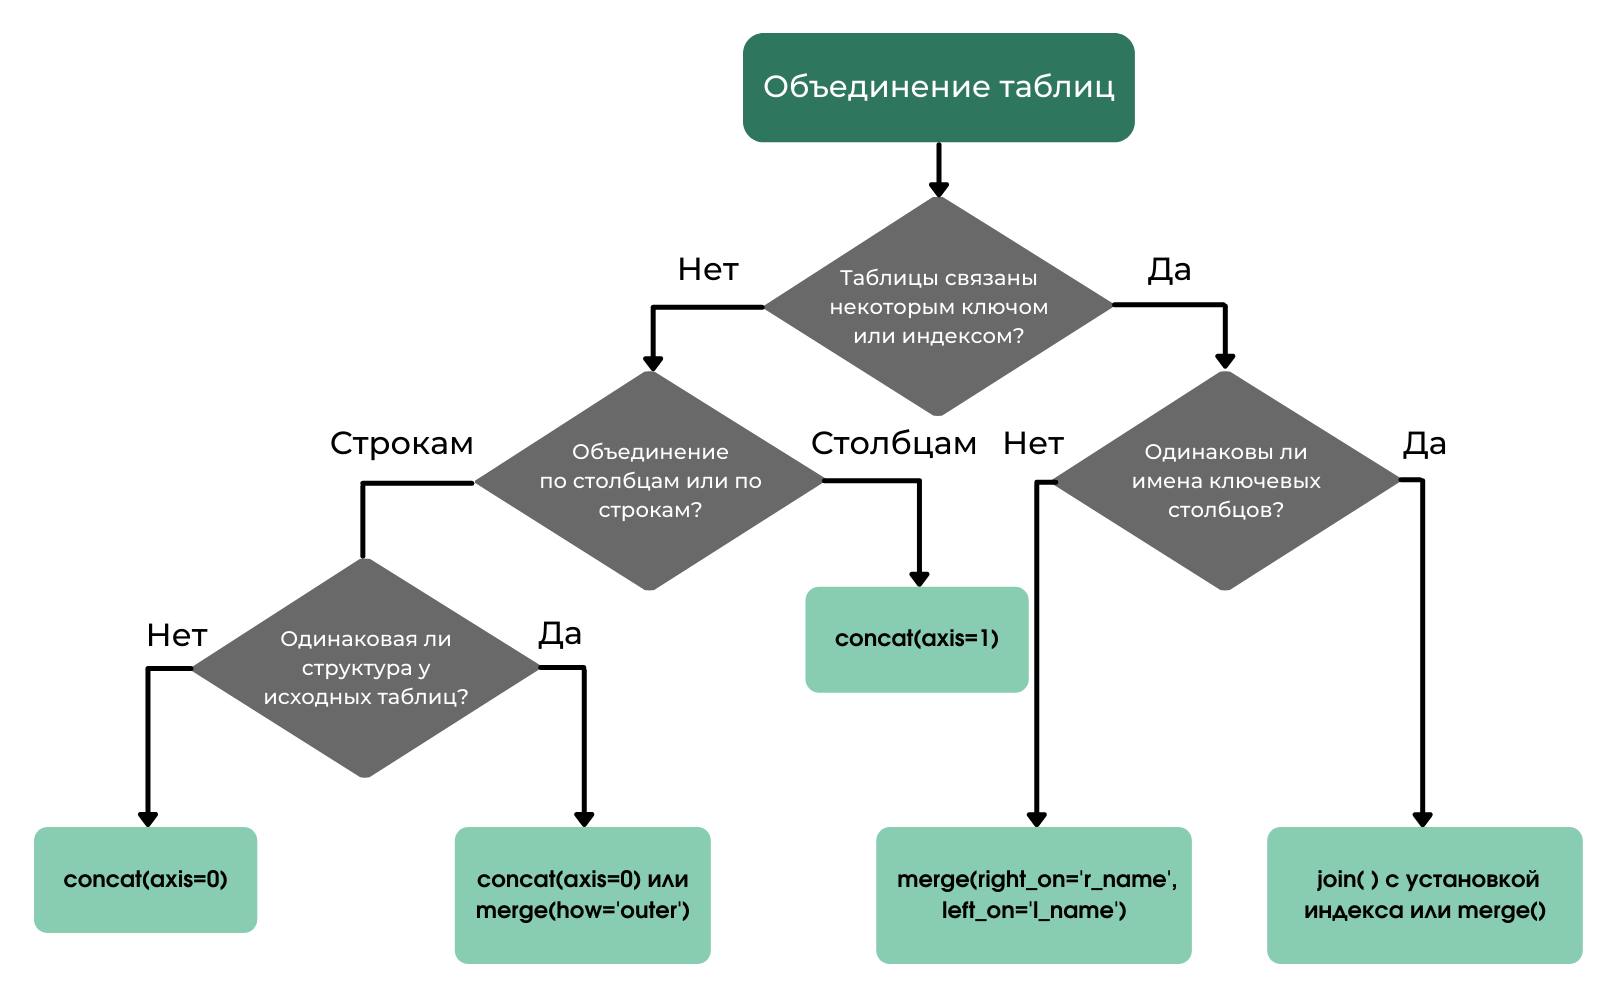

In [ ]:
items_df = pd.DataFrame({
            'item_id': [417283, 849734, 132223, 573943, 19475, 3294095, 382043, 302948, 100132, 312394],
            'vendor': ['Samsung', 'LG', 'Apple', 'Apple', 'LG', 'Apple', 'Samsung', 'Samsung', 'LG', 'ZTE'],
            'stock_count': [54, 33, 122, 18, 102, 43, 77, 143, 60, 19]
        })

purchase_df = pd.DataFrame({
            'purchase_id': [101, 101, 101, 112, 121, 145, 145, 145, 145, 221],
            'item_id': [417283, 849734, 132223, 573943, 19475, 3294095, 382043, 302948, 103845, 100132],
            'price': [13900, 5330, 38200, 49990, 9890, 33000, 67500, 34500, 89900, 11400]
        })


# Введите свое решение ниже
merged = items_df.merge(purchase_df ,on= 'item_id', how='inner') 
# производим обьединение таблиц по колонке item_id
# считаем возможную выручку по кол-ву и цене далее складываем суммы 
income = (merged['price']* merged['stock_count']).sum()

print(merged.head(12))
print(income)